# Import Dependencies

In [1]:
!pip install imblearn

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Import Data
For this project we will use a public dataset of Kaggle's webpage: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [3]:
df = pd.read_csv('Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Visualize Data

In [6]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
print("Percentage of churn cases: "+
      f"{df.Churn.value_counts()[1]/(df.Churn.value_counts()[0]+df.Churn.value_counts()[1]) * 100}")

Percentage of churn cases: 26.536987079369588


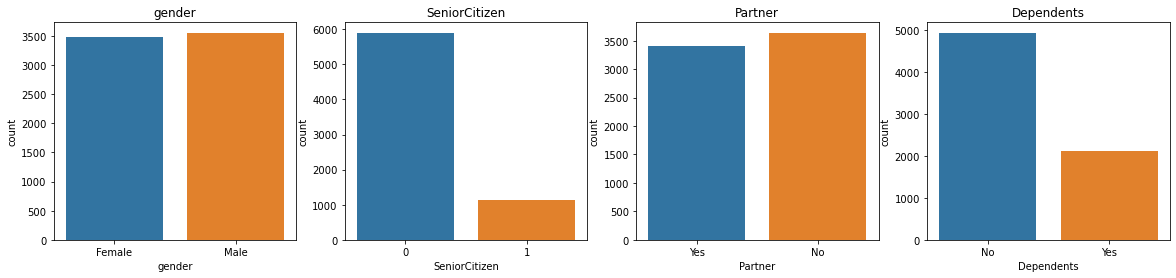

In [8]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(20,4))

for i, col in enumerate(columns):
    ax = plt.subplot(1, len(columns), i+1)
    sns.countplot(x=str(col), data=df)
    ax.set_title(f"{col}")

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

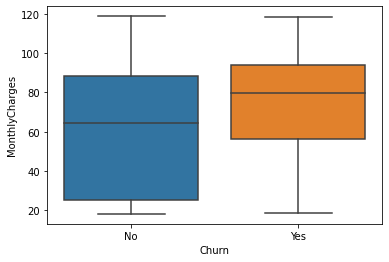

In [9]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

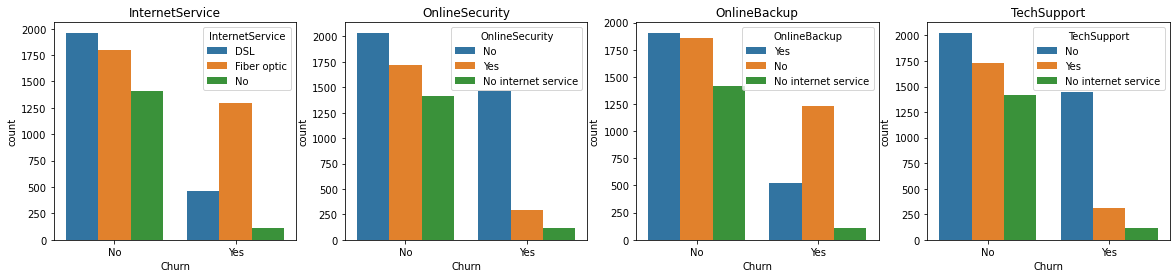

In [10]:
columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport']

plt.figure(figsize=(20,4))

for i, col in enumerate(columns):
    ax = plt.subplot(1, len(columns), i+1)
    sns.countplot(x='Churn', hue=str(col), data=df)
    ax.set_title(f"{col}")

# Prepare Data

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
cat_features_df = df.drop(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)

In [14]:
cat_features_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [15]:
label_encoder = preprocessing.LabelEncoder()
cat_df = cat_features_df.apply(label_encoder.fit_transform)

In [16]:
cat_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [17]:
num_features_df = df[['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]
final_df = pd.merge(num_features_df, cat_df, left_index=True, right_index=True)

In [18]:
final_df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


In [19]:
prepared_df = final_df.dropna().drop(['customerID'], axis=1)
prepared_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


## Oversampling
As we saw in the data preparation there is only a 26.5% of churn cases. We will use an oversampling techinique to overcome these imbalance problem.

In [20]:
X = prepared_df.drop(['Churn'], axis=1)
y = prepared_df['Churn']

In [21]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [22]:
resample_method = SMOTE()
X_resampled, y_resampled = resample_method.fit_resample(X, y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.33, random_state=1)

In [24]:
y_train.value_counts()

1    3480
0    3438
Name: Churn, dtype: int64

# Build Models
For this type of task we need a binary classifier model. We will use three different classifiers and see which one performs best, based on accuracy and confusion matrix.

In [25]:
# Random Forest Classifier model

rf = RandomForestClassifier(random_state=2)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

In [26]:
# Logistic Regression model

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Naive Bayes model

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

# Churn Prediction

In [28]:
# Random Forest Classifier prediction

prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

print('\n')

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction_rf)
print('Confusion matrix:\n', conf_mat)

0.8389084507042254


Confusion matrix:
 [[1447  278]
 [ 271 1412]]


In [29]:
# Logistic Regression prediction

prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

print('\n')

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction_lr)
print('Confusion matrix:\n', conf_mat)

0.8031103286384976


Confusion matrix:
 [[1336  389]
 [ 282 1401]]


In [30]:
# Naive Bayes prediction

prediction_nb = nb.predict(X_test)
print(accuracy_score(prediction_nb,y_test))

print('\n')

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction_nb)
print('Confusion matrix:\n', conf_mat)

0.6921948356807511


Confusion matrix:
 [[1089  636]
 [ 413 1270]]
